In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns


In [13]:
with open('primed_qtable.json', 'rb') as file:
    data = json.load(file)

In [12]:
data_df = pd.DataFrame(data)
type(data_df)

pandas.core.frame.DataFrame

In [4]:
import pickle
granularity = 4.0
HEIGHT= int(26*granularity)
WIDTH = int(26*granularity)
def load_qtable(filename="qtable.pkl"):
    with open(filename, "rb") as f:
        qtable = pickle.load(f)
    return qtable

q_table = load_qtable(filename="qtable_bad.pkl")

In [ ]:
q_table

pandas.core.frame.DataFrame

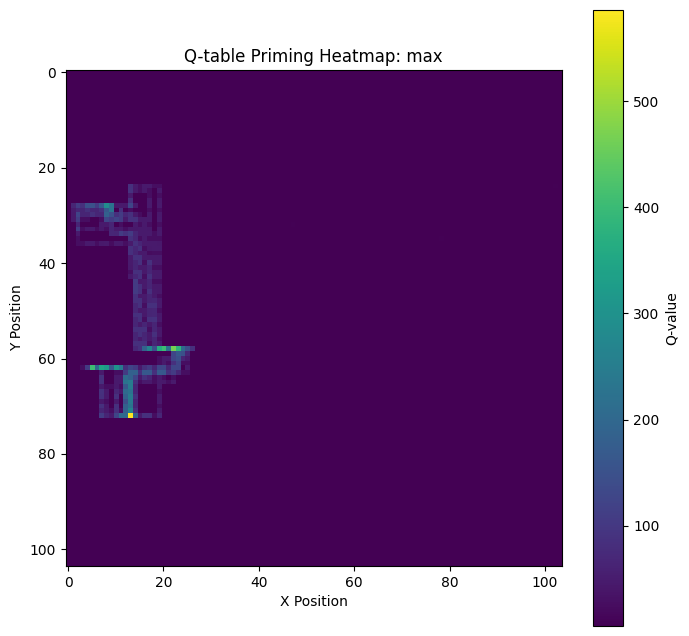

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_qtable_heatmap(qtable, mode="sum"):
    collapsed = np.zeros((HEIGHT, WIDTH))

    #encoding: ((((x,y)*2 + cart)*2 + items)*2 + checkout)

    for x in range(HEIGHT):
        for y in range(WIDTH):
            cell_value = 0
            # binary has_cart
            for cart in [0, 1]:
                # binary has_items
                for items in [0, 1]:
                    # binary has_checkour
                    for checkout in [0, 1]:
                        idx = ((((x*HEIGHT + y)*2 + cart)*2 + items)*2 + checkout)

                        if mode == "sum":
                            cell_value += qtable.loc[idx].sum() #sum of actions
                        elif mode == "max":
                            cell_value += qtable.loc[idx].max() #max of actions
                        else:
                            raise ValueError("mode wrong")

            collapsed[x, y] = cell_value

    plt.figure(figsize=(8, 8))
    plt.imshow(collapsed.T, origin="lower", aspect="equal")
    plt.colorbar(label="Q-value")
    
    ax = plt.gca()
    ax.invert_yaxis()

    plt.title(f"Q-table Priming Heatmap: {mode}")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.show()

plot_qtable_heatmap(qtable=q_table, mode="max")


In [7]:
append()

NameError: name 'append' is not defined

In [ ]:
from collections import deque

def top_checkpoints(qtable, n = 5, mode="sum"):
    collapsed = np.zeros((HEIGHT, WIDTH))
    vector = [0,0,0,0,0,0,0]
    top_checkpoints = []


    # add empty checkpoints
    for i in range(n):
        top_checkpoints.append(vector)

    # compute top5 cells
    for x in range(HEIGHT):
        for y in range(WIDTH):
            cell_value = 0
            for cart in [0, 1]:
                for items in [0, 1]:
                    for checkout in [0, 1]:
                        idx = ((((x*HEIGHT + y)*2 + cart)*2 + items)*2 + checkout)
                        
                        if mode == "sum": # if sum
                            cell_value += qtable.loc[idx].sum()
                        elif mode == "max": # if max
                            cell_value += qtable.loc[idx].max()
                        else:
                            raise ValueError("mode wrong")
                        
                        vector = [idx, x, y, cart, items, checkout, cell_value]

                        # replace empty or lower checkpoints
                        for i, item in enumerate(top_checkpoints):
                            if cell_value > top_checkpoints[i][-1]:
                                top_checkpoints[i] = vector
                                break

            collapsed[x, y] = cell_value

    return top_checkpoints #return top n checkpoints

checkpoints = top_checkpoints(q_table, n = 5, mode = "max")
print(checkpoints)


[[11399, 13, 72, 1, 1, 1, np.float64(586.007166998146)], [18775, 22, 58, 1, 1, 1, np.float64(466.4918407706422)], [19607, 23, 58, 1, 1, 1, np.float64(385.8345570884471)], [8823, 10, 62, 1, 1, 1, np.float64(307.0806547401233)], [14615, 17, 58, 1, 1, 1, np.float64(267.3771139421194)]]


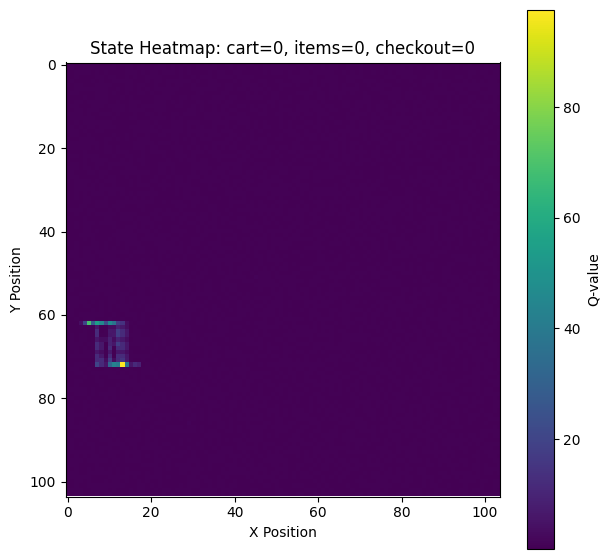

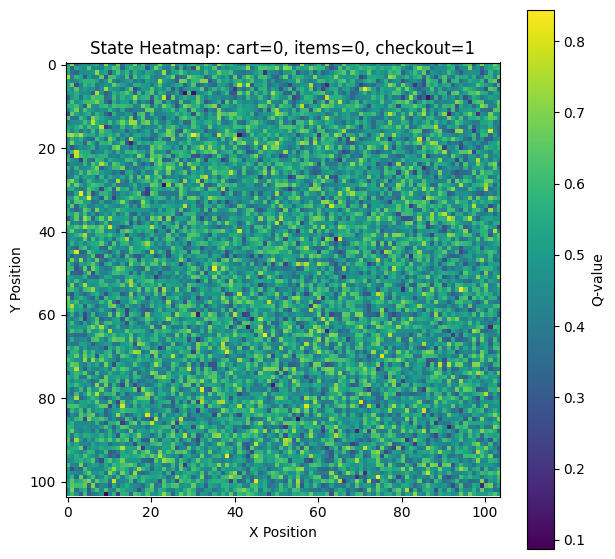

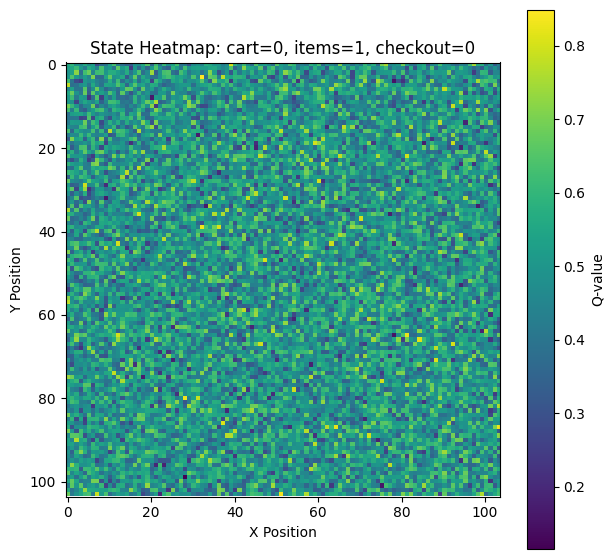

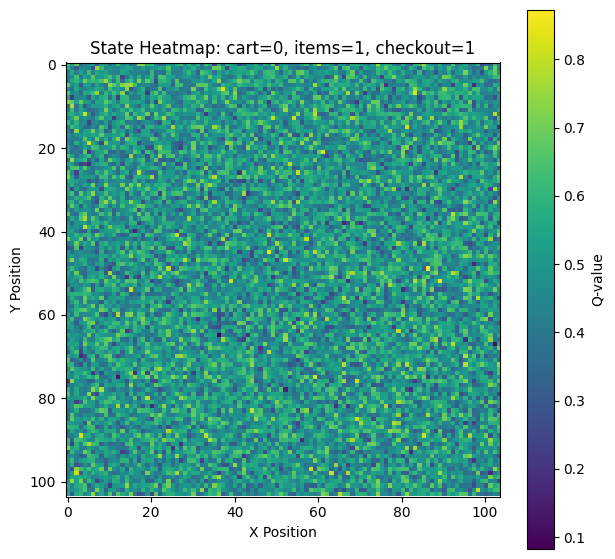

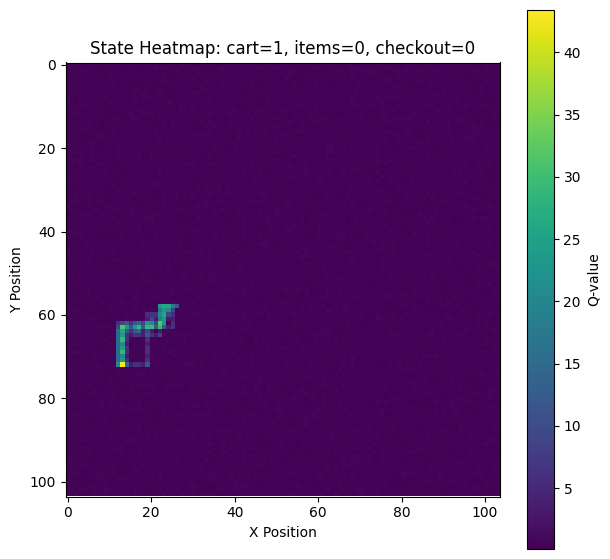

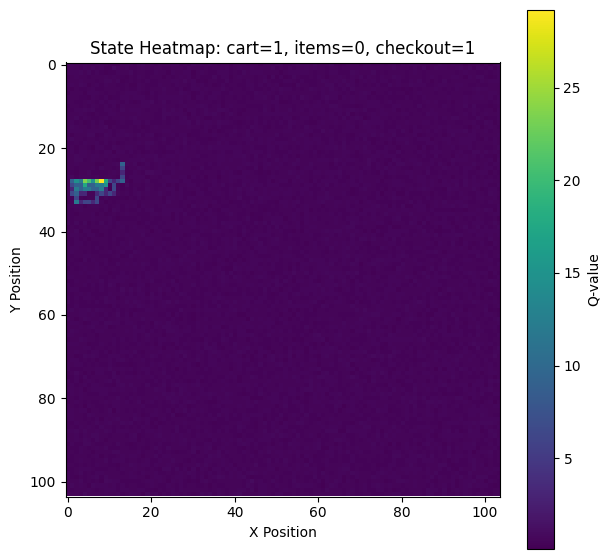

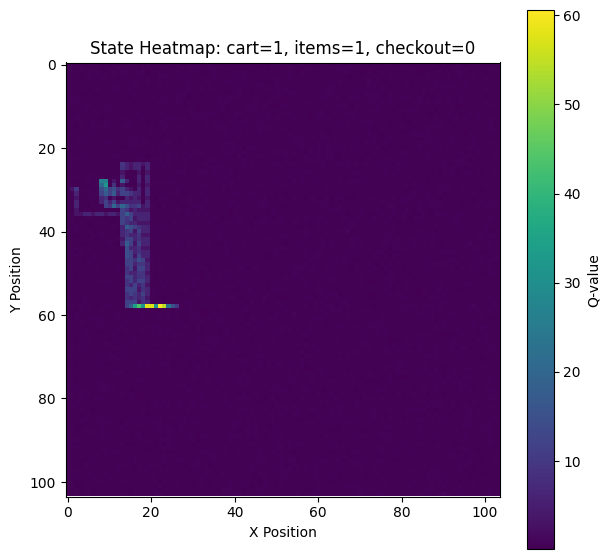

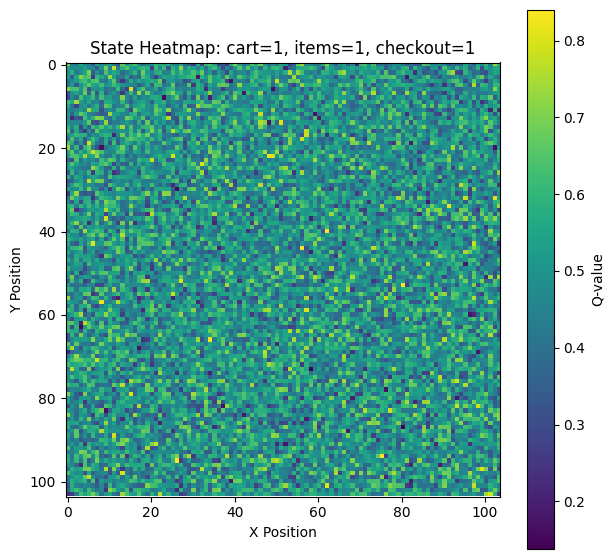

In [18]:
import itertools

def plot_qtable_states(qtable):
    binary_states = list(itertools.product([0,1], repeat=3))

    for cart, items, checkout in binary_states:

        heatmap = np.zeros((HEIGHT, WIDTH))

        for x in range(HEIGHT):
            for y in range(WIDTH):

                idx = ((((x*HEIGHT + y)*2 + cart)*2 + items)*2 + checkout)
                qvals = qtable.loc[idx].values
                heatmap[x, y] = qvals.mean()

        plt.figure(figsize=(7, 7))
        plt.imshow(heatmap.T, origin="lower", aspect="equal")
        plt.colorbar(label="Q-value")

        ax = plt.gca()
        ax.invert_yaxis()

        plt.title(f"State Heatmap: cart={cart}, items={items}, checkout={checkout}")
        plt.xlabel("X Position")
        plt.ylabel("Y Position")

        plt.show()

plot_qtable_states(q_table)
